In [1]:
import numpy as np
import pandas as pd
import scanpy as sc 
import scirpy as ir
import muon as mu

In [2]:
sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor="white")

scanpy==1.10.2 anndata==0.10.8 umap==0.5.6 numpy==1.26.4 scipy==1.14.0 pandas==2.2.2 scikit-learn==1.5.1 statsmodels==0.14.2 igraph==0.11.5 pynndescent==0.5.13


In [3]:
mdata = mu.read("/Users/jerryaaaaaa/tcr_model_2.h5mu")

/opt/miniconda3/lib/python3.12/site-packages/anndata/utils.py:334: ExperimentalFeatureWarning: Support for Awkward Arrays is currently experimental. Behavior may change in the future. Please report any issues you may encounter!
  warnings.warn(msg, category, stacklevel=stacklevel)


In [5]:
vdjdb = ir.datasets.vdjdb()

In [6]:
ir.pp.ir_dist(mdata, vdjdb, metric="identity", sequence="aa")

Computing sequence x sequence distance matrix for VJ sequences.
Computing sequence x sequence distance matrix for VDJ sequences.


In [7]:
ir.tl.ir_query(
    mdata,
    vdjdb,
    metric="identity",
    sequence="aa",
    receptor_arms="any",
    dual_ir="any"
)

Initializing lookup tables. 
--> Done initializing lookup tables. (0:00:03)
Computing clonotype x clonotype distances.
--> Done computing clonotype x clonotype distances.  (0:00:00)
Stored IR distance matrix in `adata.uns["ir_query_VDJDB_aa_identity"]`.


In [8]:
ir.tl.ir_query_annotate_df(
    mdata,
    vdjdb,
    metric="identity",
    sequence="aa",
    include_ref_cols=["antigen.species", "antigen.gene"],
)

,antigen.species,antigen.gene
AAACGGGGTCGCATAT-1,InfluenzaA,M
AAAGATGAGGAGTCTG-1,InfluenzaA,M
AAAGCAAGTTGCGCAC-1,InfluenzaA,M
AACACGTGTACCGGCT-1,InfluenzaA,M
AACCATGGTTTCGCTC-1,CMV,IE1
...,...,...
TTTATGCTCTAACGGT-1,EBV,BZLF1
TTTATGCTCTAACGGT-1,EBV,BZLF1
TTTATGCTCTAACGGT-1,CMV,IE1
TTTATGCTCTAACGGT-1,EBV,BZLF1


In [12]:
ir.tl.ir_query_annotate(
    mdata,
    vdjdb,
    metric="identity",
    sequence="aa",
    include_ref_cols=["antigen.species"],
    strategy="most-frequent"
)

  0%|          | 0/221 [00:00<?, ?it/s]

Stored result in `mdata.obs["airr:antigen.species"]`.


/opt/miniconda3/lib/python3.12/site-packages/scirpy/tl/_ir_query.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return values[0]


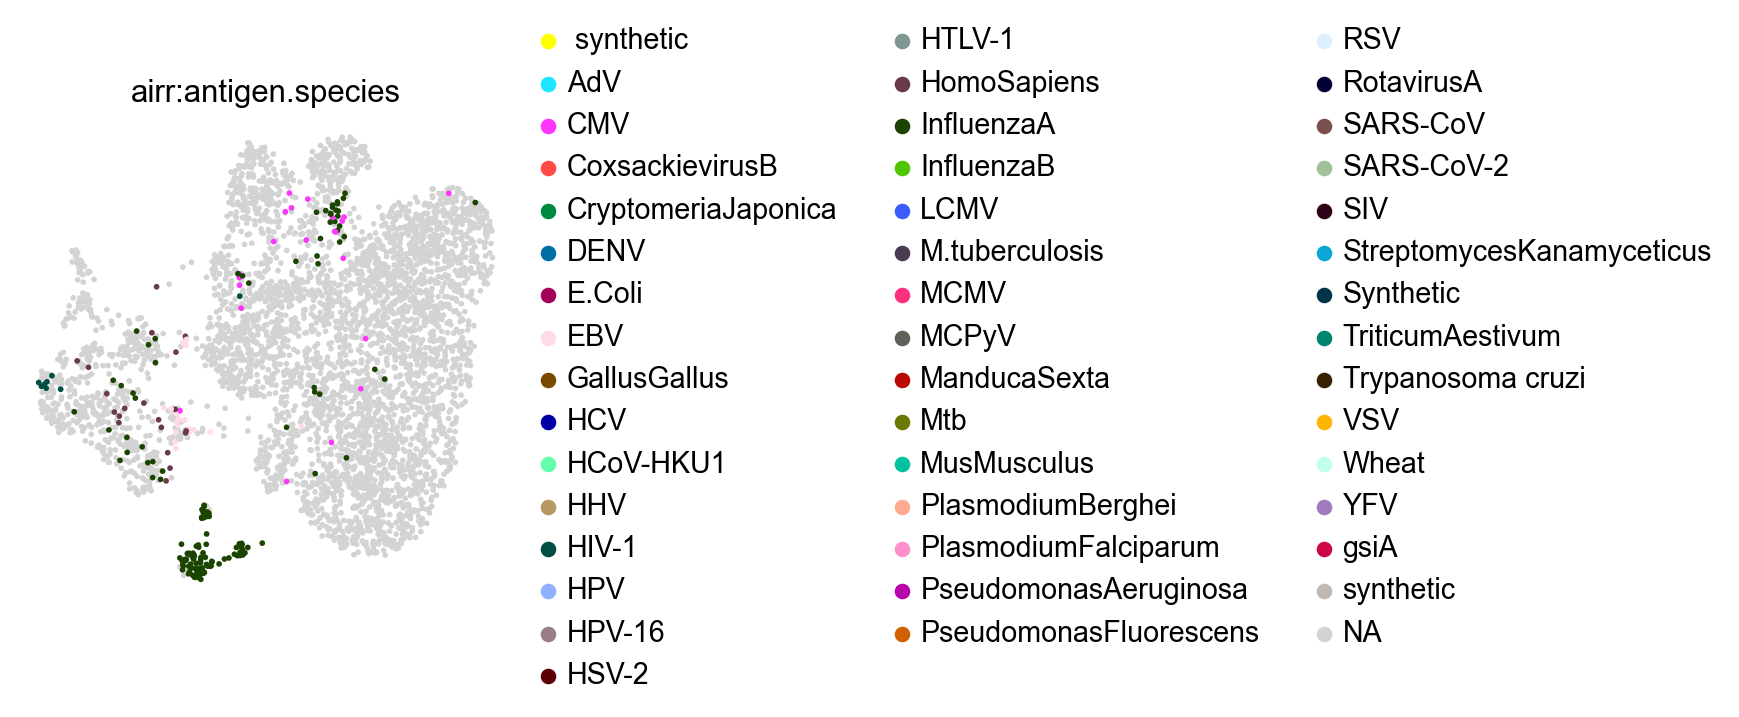

In [23]:
mu.pl.embedding(mdata, "gex:umap", color="airr:antigen.species", frameon=False)

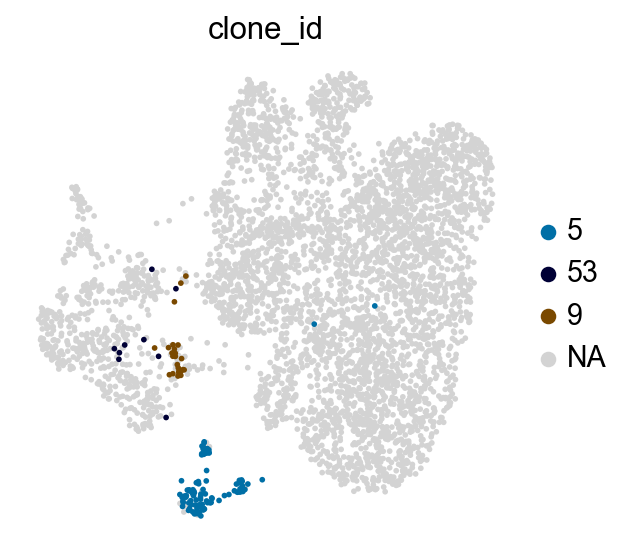

In [58]:
sc.pl.umap(mdata["gex"], color="clone_id", groups=["53", "5", "9"], frameon=False)

In [19]:
vdj_df = ir.tl.ir_query_annotate_df(
    mdata,
    vdjdb,
    metric="identity",
    sequence="aa",
)

In [26]:
vdj_df["cell_id"] = vdj_df.index

In [38]:
vdj_df_1 = vdj_df[["cell_id", "antigen.epitope", "antigen.species"]].copy()

In [34]:
clonal_info = mdata["gex"].obs[["clone_id"]].copy()

In [36]:
clonal_info["cell_id"] = clonal_info.index

In [40]:
epitope_df = vdj_df_1.merge(clonal_info, on="cell_id", how="left")

In [46]:
epitope_df.to_csv("/Users/jerryaaaaaa/epitope_query_vdjdb.csv")

In [47]:
vdj_df

,antigen.epitope,antigen.gene,antigen.species,meta.cell.subset,meta.clone.id,meta.donor.MHC,meta.donor.MHC.method,meta.epitope.id,meta.replica.id,meta.structure.id,...,method.identification,method.sequencing,method.singlecell,method.verification,mhc.a,mhc.b,mhc.class,reference.id,species,cell_id
AAACGGGGTCGCATAT-1,GILGFVFTL,M,InfluenzaA,CD8+,NaN,NaN,NaN,20354,NaN,NaN,...,"antigen-loaded-targets,dextramer-sort",amplicon-seq,NaN,NaN,HLA-A*02,B2M,MHCI,PMID:28423320,HomoSapiens,AAACGGGGTCGCATAT-1
AAAGATGAGGAGTCTG-1,GILGFVFTL,M,InfluenzaA,CD8+,NaN,NaN,NaN,20354,NaN,NaN,...,"antigen-loaded-targets,dextramer-sort",amplicon-seq,NaN,NaN,HLA-A*02,B2M,MHCI,PMID:28423320,HomoSapiens,AAAGATGAGGAGTCTG-1
AAAGCAAGTTGCGCAC-1,GILGFVFTL,M,InfluenzaA,CD8+,NaN,NaN,NaN,20354,NaN,NaN,...,"antigen-loaded-targets,dextramer-sort",amplicon-seq,NaN,NaN,HLA-A*02,B2M,MHCI,PMID:28423320,HomoSapiens,AAAGCAAGTTGCGCAC-1
AACACGTGTACCGGCT-1,GILGFVFTL,M,InfluenzaA,CD8+,NaN,NaN,NaN,20354,NaN,NaN,...,"antigen-loaded-targets,dextramer-sort",amplicon-seq,NaN,NaN,HLA-A*02,B2M,MHCI,PMID:28423320,HomoSapiens,AACACGTGTACCGGCT-1
AACCATGGTTTCGCTC-1,KLGGALQAK,IE1,CMV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,dextramer-sort,rna-seq,yes,NaN,HLA-A*03:01,B2M,MHCI,https://www.10xgenomics.com/resources/applicat...,HomoSapiens,AACCATGGTTTCGCTC-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTATGCTCTAACGGT-1,RAKFKQLL,BZLF1,EBV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,dextramer-sort,rna-seq,yes,NaN,HLA-B*08:01,B2M,MHCI,https://www.10xgenomics.com/resources/applicat...,HomoSapiens,TTTATGCTCTAACGGT-1
TTTATGCTCTAACGGT-1,RAKFKQLL,BZLF1,EBV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,dextramer-sort,rna-seq,yes,NaN,HLA-B*08:01,B2M,MHCI,https://www.10xgenomics.com/resources/applicat...,HomoSapiens,TTTATGCTCTAACGGT-1
TTTATGCTCTAACGGT-1,KLGGALQAK,IE1,CMV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,dextramer-sort,rna-seq,yes,NaN,HLA-A*03:01,B2M,MHCI,https://www.10xgenomics.com/resources/applicat...,HomoSapiens,TTTATGCTCTAACGGT-1
TTTATGCTCTAACGGT-1,RAKFKQLL,BZLF1,EBV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,dextramer-sort,rna-seq,yes,NaN,HLA-B*08:01,B2M,MHCI,https://www.10xgenomics.com/resources/applicat...,HomoSapiens,TTTATGCTCTAACGGT-1


In [49]:
mdata["gex"].obs["antigen.species"] = mdata["airr"].obs["antigen.species"]
mdata["gex"].obs["antigen.species"] = mdata["gex"].obs["antigen.species"].astype("category")
mdata["gex"].obs["antigen.species"] = mdata["gex"].obs["antigen.species"].cat.remove_unused_categories()

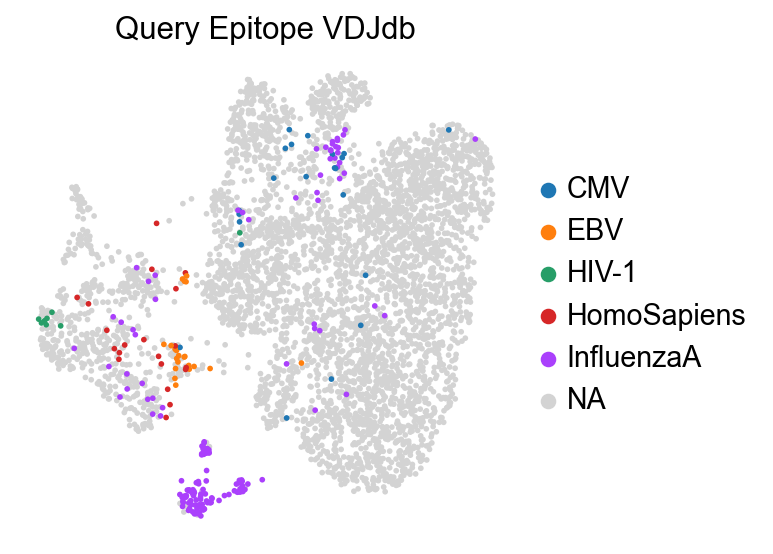

In [54]:
sc.pl.umap(mdata["gex"], color="antigen.species", frameon=False, title="Query Epitope VDJdb")

In [56]:
valid_cells = mdata["gex"].obs[~mdata["gex"].obs["clonal_dynamic_label"].isna()].index
mdata_filtered = mdata[valid_cells].copy()

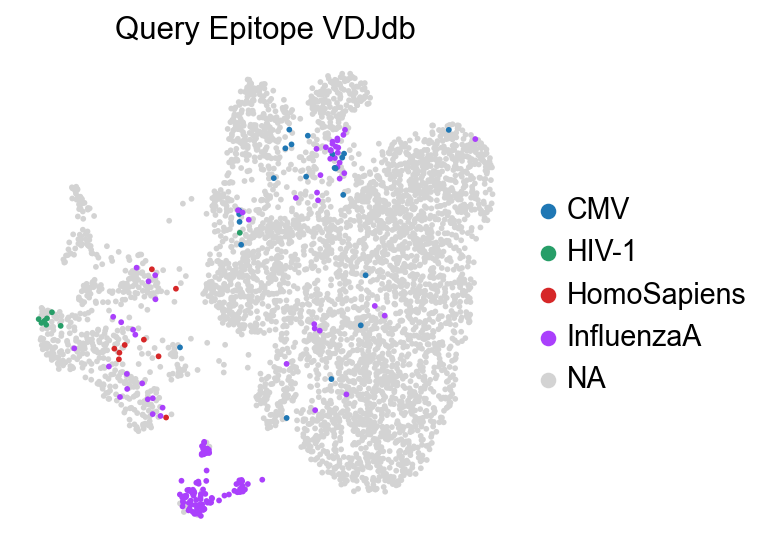

In [57]:
sc.pl.umap(mdata_filtered["gex"], color="antigen.species", frameon=False, title="Query Epitope VDJdb")

In [65]:
mdata_all = mu.read("/Users/jerryaaaaaa/scTCR_merged_res0.2.h5mu")

In [66]:
mdata_all["gex"].obs["clone_id"] = mdata_all["airr"].obs["clone_id"]

In [67]:
import seaborn as sns

In [68]:
clone_palette = sns.color_palette("husl", n_colors=350)

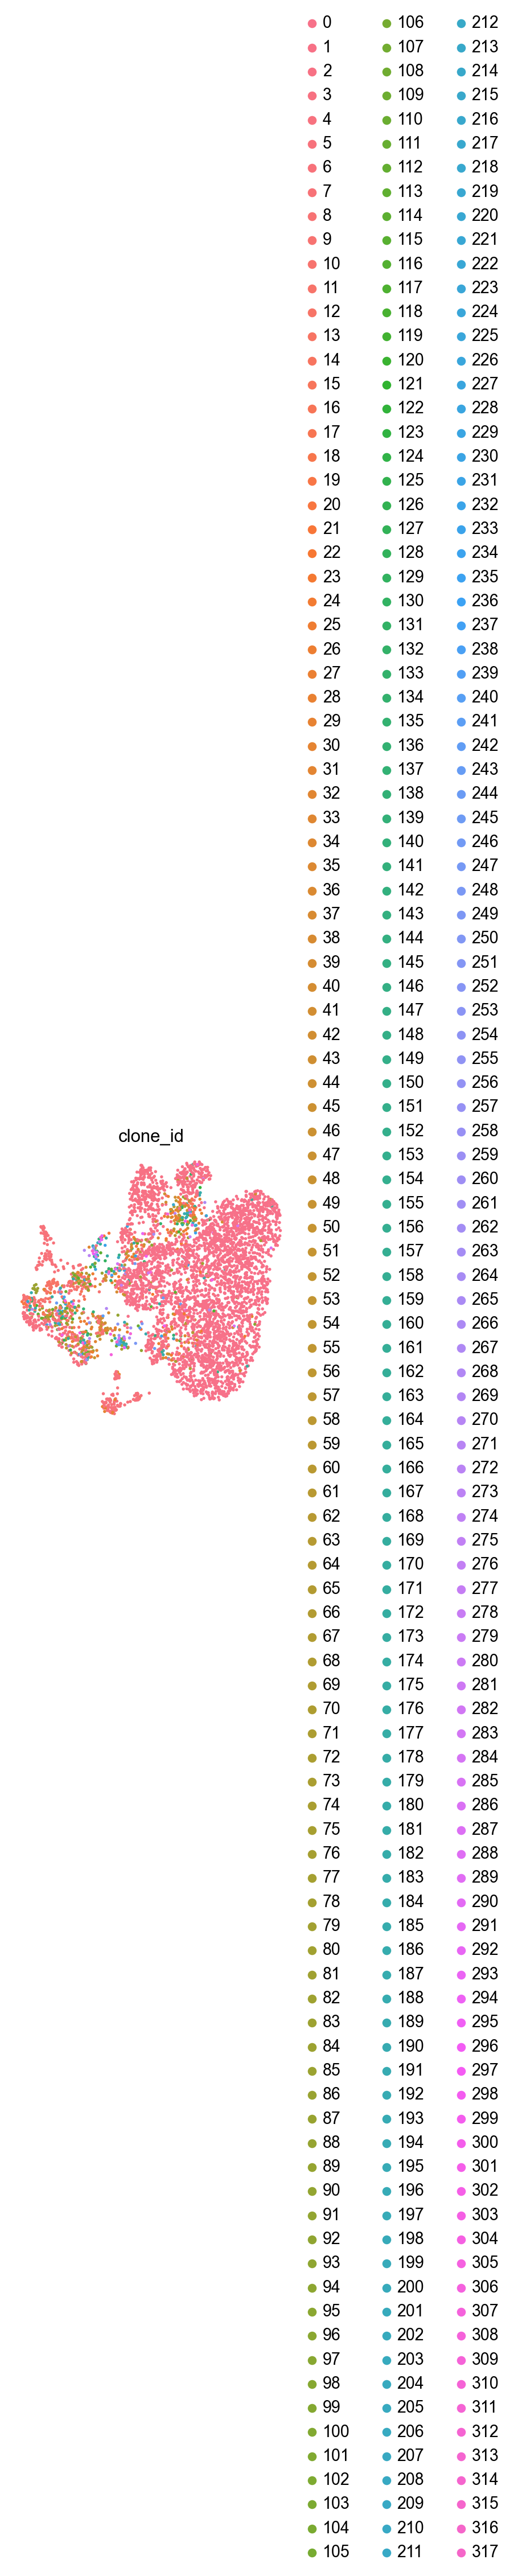

In [69]:
sc.pl.umap(mdata_all["gex"], color="clone_id", palette=clone_palette, frameon=False)

In [70]:
ir.pp.ir_dist(mdata_all, vdjdb, metric="identity", sequence="aa")

Computing sequence x sequence distance matrix for VJ sequences.
Computing sequence x sequence distance matrix for VDJ sequences.


In [71]:
ir.tl.ir_query(
    mdata_all,
    vdjdb,
    metric="identity",
    sequence="aa",
    receptor_arms="any",
    dual_ir="any"
)

Initializing lookup tables. 
--> Done initializing lookup tables. (0:00:03)
Computing clonotype x clonotype distances.
--> Done computing clonotype x clonotype distances.  (0:00:00)
Stored IR distance matrix in `adata.uns["ir_query_VDJDB_aa_identity"]`.


In [72]:
ir.tl.ir_query_annotate(
    mdata_all,
    vdjdb,
    metric="identity",
    sequence="aa",
    include_ref_cols=["antigen.species"],
    strategy="most-frequent"
)

  0%|          | 0/251 [00:00<?, ?it/s]

Stored result in `mdata.obs["airr:antigen.species"]`.


/opt/miniconda3/lib/python3.12/site-packages/scirpy/tl/_ir_query.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return values[0]


In [80]:
epitope_palette = sns.color_palette("husl", n_colors=8)

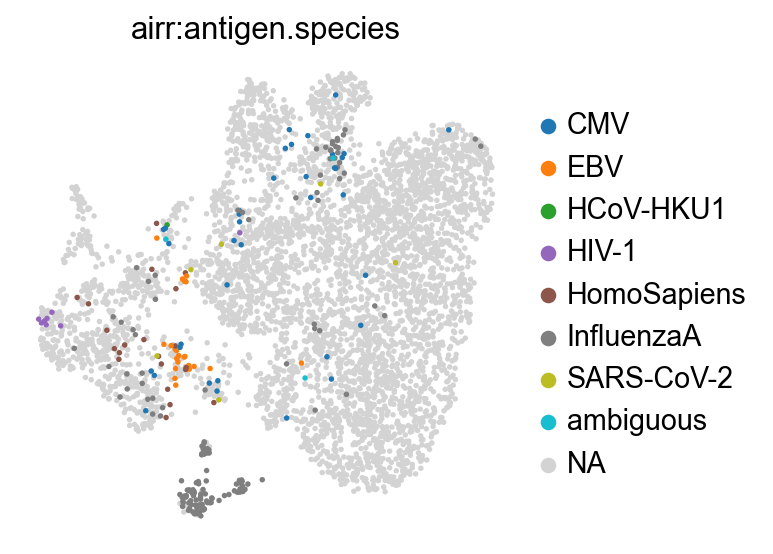

In [89]:
mu.pl.embedding(mdata_all, basis="gex:umap", color="airr:antigen.species", frameon=False, palette="tab10")

In [75]:
cdr3_info = ir.get.airr(
    mdata_all["airr"],
    airr_variable=["cdr3_aa"],
    chain=["VJ_1", "VDJ_1"]
)
clone_info = mdata_all["airr"].obs[["clone_id", "clone_id_size"]].copy()
tcr_info = clone_info.join(cdr3_info, how="inner")

In [76]:
tcr_info.reset_index(inplace=True)

In [77]:
tcr_per_clone = (
    tcr_info.groupby("clone_id")[["clone_id_size", "VDJ_1_cdr3_aa"]]
    .agg(lambda x: x.value_counts().index[0])
    .reset_index()
)

/var/folders/s3/tmfhtnzx1g34x3_f84h69dh40000gn/T/ipykernel_59601/1398339022.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tcr_info.groupby("clone_id")[["clone_id_size", "VDJ_1_cdr3_aa"]]


In [78]:
tcr_per_clone

,clone_id,clone_id_size,VDJ_1_cdr3_aa
0,0,2879,ASSVEPQLAGRGDTQY
1,1,219,ASSYYRPTGPYEQY
2,2,486,ASSRGQYTGELF
3,3,172,ASSARGTKNIQY
4,4,24,ASSLGLRNEQY
...,...,...,...
313,313,1,ASGEGTDTQY
314,314,1,SATALEGDTQY
315,315,1,ATSRTRQGGNTDTQY
316,316,1,ASSLLAGSGTGELF


In [79]:
tcr_per_clone.to_csv("/Users/jerryaaaaaa/tcr_per_clone_total.csv")